# pandas字符串操作
很明显除了数值型，我们处理的数据还有很多字符类型的，而这部分数据显然也非常重要，因此这个部分我们提一提pandas的字符串处理。

In [7]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

前面看到pandas在处理数值型的时候，各种如鱼得水，偷偷告诉你，pandas处理字符串也相当生猛。<br>
咱们来读一份天气数据。

In [8]:
weather_2012 = pd.read_csv('../data/weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_2012[:5]

Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
Date/Time                                                        
2012-01-01 00:00:00      -1.8                -3.9           86   
2012-01-01 01:00:00      -1.8                -3.7           87   
2012-01-01 02:00:00      -1.8                -3.4           89   
2012-01-01 03:00:00      -1.5                -3.2           88   
2012-01-01 04:00:00      -1.5                -3.3           88   

                     Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)  \
Date/Time                                                                
2012-01-01 00:00:00                4              8.0           101.24   
2012-01-01 01:00:00                4              8.0           101.24   
2012-01-01 02:00:00                7              4.0           101.26   
2012-01-01 03:00:00                6              4.0           101.27   
2012-01-01 04:00:00                7              4.8           101.23   

                                  Weather  
Date/Time                                  
2012-01-01 00:00:00                   Fog  
2012-01-01 01:00:00                   Fog  
2012-01-01 02:00:00  Freezing Drizzle,Fog  
2012-01-01 03:00:00  Freezing Drizzle,Fog  
2012-01-01 04:00:00                   Fog  

[5 rows x 7 columns]

# 5.1字符串操作

从上面的数据里面可以看到，有 'Weather' 这一列。我们这里假定包含 "Snow" 的才是下雪天。

pandas的str类型提供了一系列方便的函数，比如这里的contains，更多的例子可以查看 [这里](http://pandas.pydata.org/pandas-docs/stable/basics.html#vectorized-string-methods)。

In [9]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

你看我们contains返回的其实是布尔型的判定结果的dataframe。

In [10]:
# 返回bool型内容的dataframe
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

你以为懒癌晚期的我会一个个去看吗！！图样图森破！！我一个函数就给你画出来了！！！

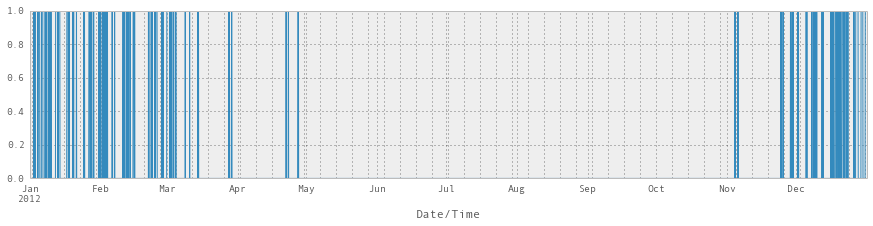

In [11]:
# 就是屌！！！
is_snowing.plot()

# 6.2 平均气温

如果我们想知道每个月的温度值中位数，有一个很有用的函数可以调用哈，叫 `resample()` 

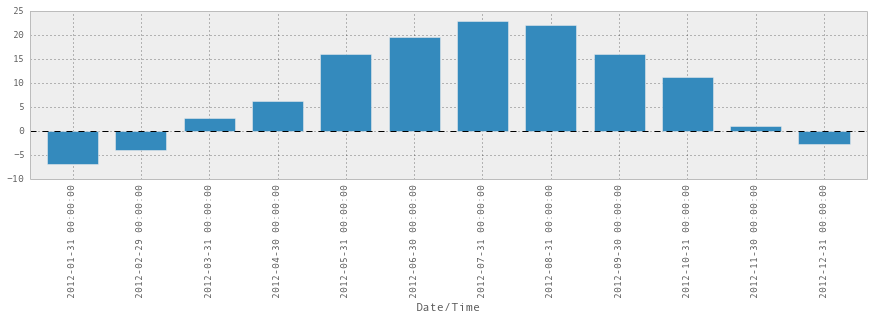

In [12]:
weather_2012['Temp (C)'].resample('M', how=np.median).plot(kind='bar')

符合预期对吧，7月和8月是温度最高的

你要知道，布尔型的 `True` 和 `False`其实是不便于运算的，当然，其实他们就是0和1了，所以我们转成float型去做做运算可好？

In [13]:
is_snowing.astype(float)[:10]

Date/Time
2012-01-01 00:00:00    0
2012-01-01 01:00:00    0
2012-01-01 02:00:00    0
2012-01-01 03:00:00    0
2012-01-01 04:00:00    0
2012-01-01 05:00:00    0
2012-01-01 06:00:00    0
2012-01-01 07:00:00    0
2012-01-01 08:00:00    0
2012-01-01 09:00:00    0
Name: Weather, dtype: float64

然后我们很聪明地用 `resample` 去找到每个月下雪的比例状况（为嘛感觉在做很无聊的事情，其实哪个月下雪多我们知道的对么...）

In [14]:
is_snowing.astype(float).resample('M', how=np.mean)

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

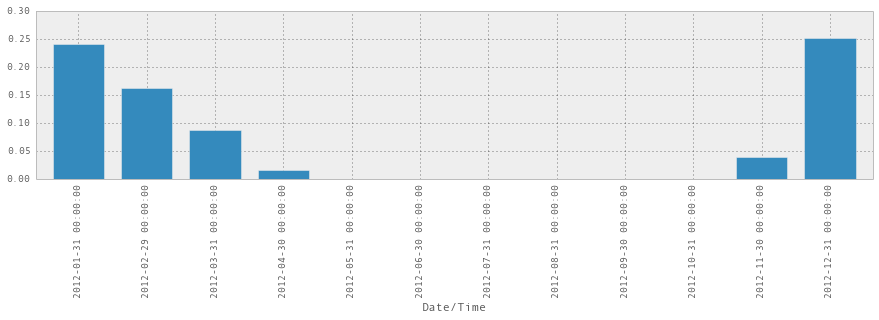

In [15]:
is_snowing.astype(float).resample('M', how=np.mean).plot(kind='bar')

So，你也看到了，加拿大的12月是下雪最多的月份。然后你还能观察到一些其他的端倪，比如你会发现，11月开始突然下雪，接着就雪期漫漫，虽然下雪的概率逐步减小，但是可能要到4月或者5月才会停止。

# 5.3 画一下温度和雪期

我们把温度和下雪概率放到一起，组成dataframe的2列，然后画个图

In [16]:
temperature = weather_2012['Temp (C)'].resample('M', how=np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M', how=np.mean)

# 给列取个名字
temperature.name = "Temperature"
snowiness.name = "Snowiness"

### 我们用concat完成字符串的拼接

用 `concat` 把这两列拼接到一列中，组成一个新的dataframe

In [17]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

Temperature  Snowiness
2012-01-31        -7.05   0.240591
2012-02-29        -4.10   0.162356
2012-03-31         2.60   0.087366
2012-04-30         6.30   0.015278
2012-05-31        16.05   0.000000
2012-06-30        19.60   0.000000
2012-07-31        22.90   0.000000
2012-08-31        22.20   0.000000
2012-09-30        16.10   0.000000
2012-10-31        11.30   0.000000
2012-11-30         1.05   0.038889
2012-12-31        -2.85   0.251344

[12 rows x 2 columns]

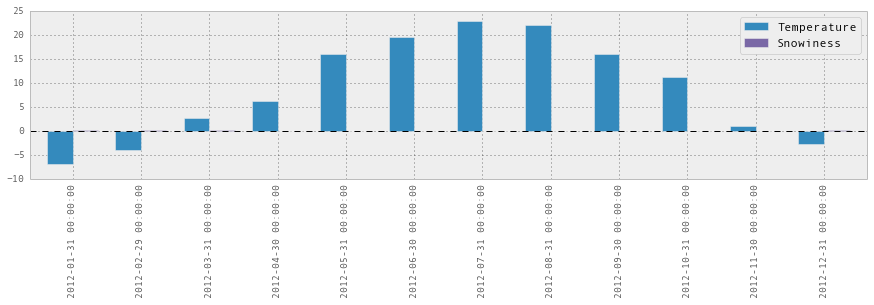

In [18]:
stats.plot(kind='bar')

你发现，什么鬼！！！紫色的下雪概率呢！！！<br>
是的亲，你这2个维度的幅度是不一样的，所以要分开画哦。

array([<matplotlib.axes.AxesSubplot object at 0x10c268650>,
       <matplotlib.axes.AxesSubplot object at 0x10c7c1390>], dtype=object)

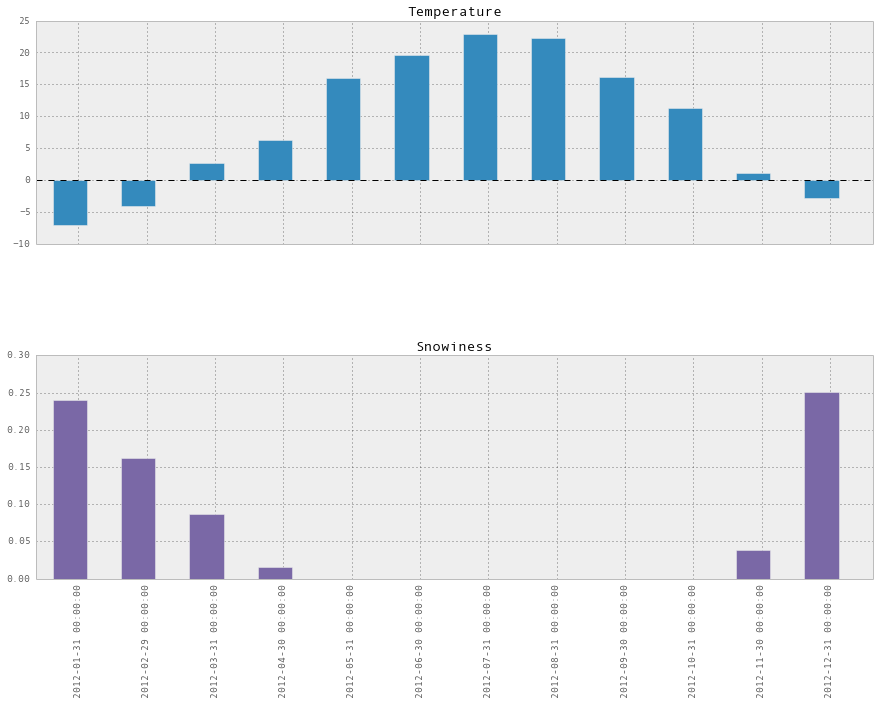

In [19]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  